# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.79M/6.79M [00:01<00:00, 6.38MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
extracted_rows = weather_soup.find_all('tr', 'data-row')
print(extracted_rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for extracted_row in extracted_rows:
    rows_with_tds = extracted_row.find_all('td')
    rows.append([td.text for td in rows_with_tds])
print(rows)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

weather_df = pd.DataFrame(rows, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
weather_df["terrestrial_date"] = pd.to_datetime(weather_df["terrestrial_date"])
weather_df[["sol","ls","month"]] = weather_df[["sol","ls","month"]].astype('int64')
weather_df[["min_temp","pressure"]] = weather_df[["min_temp","pressure"]].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

# First count the values for each unique "month", then sort by the index to find the total number of months.
months = weather_df.month.value_counts().sort_index()
print(months)

################################
# There are 12 Martian months. #
################################

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?

# Initially I was going to simply take the maximum value of the 'sol' column, but it is missing some data points.
# Instead, I summed up the value counts from Question 1 to find the total number of Martian days' worth of data.
months.sum()

################################################
# There are 1,867 Martian days' worth of data. #
################################################

1867

In [17]:
# 3. What is the average low temperature by month?

# Perform a groupby on the "month" column and then calculate the mean of the resulting min_temp for each month.
avg_min_T = weather_df.groupby("month").min_temp.mean()
print(avg_min_T)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

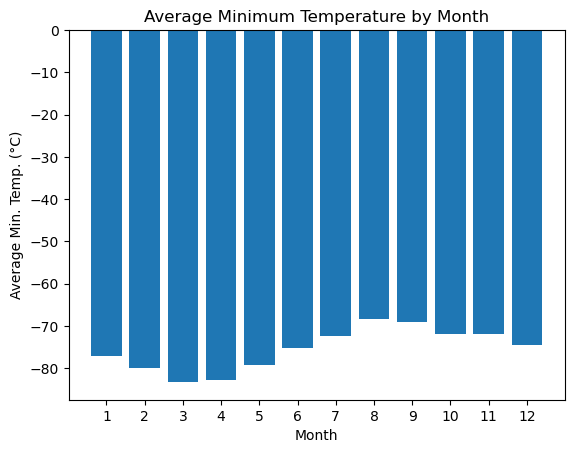

In [18]:
# Plot the average temperature by month

# First convert avg_min_T to a DataFrame and reset index for plotting purposes.
avg_min_T_df = pd.DataFrame(avg_min_T)
avg_min_T_df.reset_index(inplace=True)
# avg_min_T_df.head()

# Create plot.
plt.bar(avg_min_T_df["month"], avg_min_T_df["min_temp"])

# Create labels for the x and y axes.
plt.xlabel("Month")
plt.xticks(range(1,13))
plt.ylabel("Average Min. Temp. (°C)")

# Create title.
plt.title('Average Minimum Temperature by Month')

Text(0.5, 1.0, 'Average Minimum Temperature by Month')

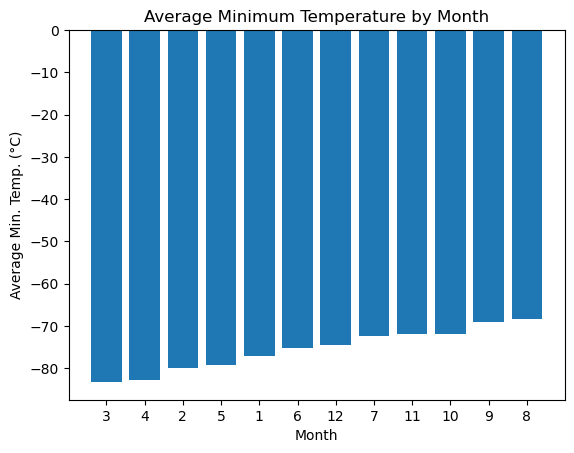

In [19]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the DataFrame by the average minimum temperature.
avg_min_T_sorted_df = avg_min_T_df.sort_values(by="min_temp")

# Create plot.
plt.bar(range(1,13), avg_min_T_sorted_df["min_temp"])

# Create labels for the x and y axes.
plt.xlabel("Month")
xtick = avg_min_T_sorted_df["month"]
plt.xticks(ticks=range(1,13), labels=xtick)
plt.ylabel("Average Min. Temp. (°C)")

# Create title.
plt.title('Average Minimum Temperature by Month')

###########################################
# The coldest month is Month 3 (-83.3°C). #
# The hottest month is Month 8 (-68.4°C). #
###########################################

In [20]:
# 4. Average pressure by Martian month

# Perform a groupby on the "month" column and then calculate the mean of the resulting pressure for each month.
avg_min_P = weather_df.groupby("month").pressure.mean()
print(avg_min_P)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0.5, 1.0, 'Average Pressure by Month')

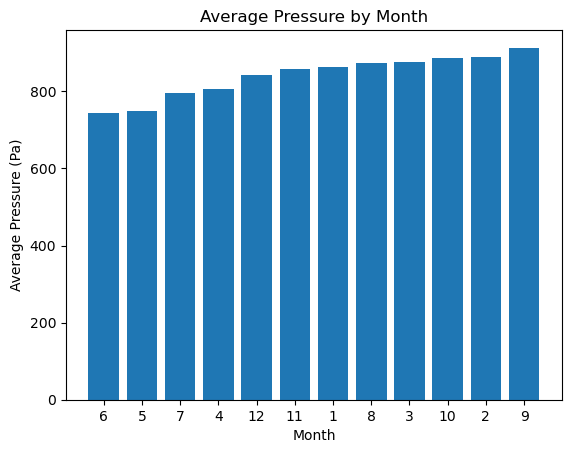

In [26]:
# Plot the average pressure by month

# First convert avg_min_P to a DataFrame and reset index for plotting purposes.
avg_min_P_df = pd.DataFrame(avg_min_P)
avg_min_P_df.reset_index(inplace=True)
# avg_min_P_df.head()

# Sort the DataFrame by the average minimum pressure.
avg_min_P_sorted_df = avg_min_P_df.sort_values(by="pressure")

# Create plot.
plt.bar(range(1,13), avg_min_P_sorted_df["pressure"])

# Create labels for the x and y axes.
plt.xlabel("Month")
xtick = avg_min_P_sorted_df["month"]
plt.xticks(ticks=range(1,13), labels=xtick)
plt.ylabel("Average Pressure (Pa)")

# Create title.
plt.title('Average Pressure by Month')

##################################################################
# Month 6 has the lowest average atmospheric pressure (745 Pa).  #
# Month 9 has the highest average atmospheric pressure (913 Pa). #
##################################################################

Text(0.5, 1.0, 'Daily Minimum Temperature')

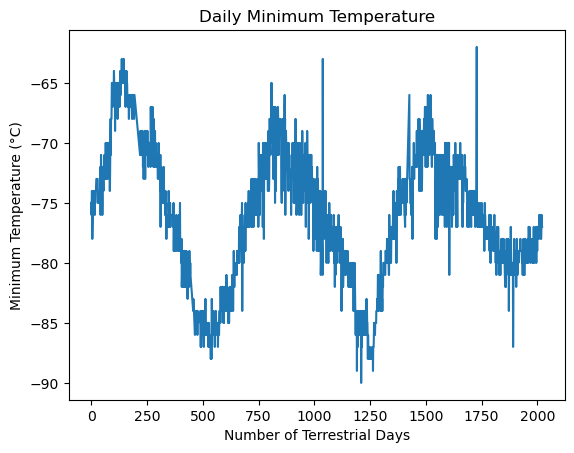

In [55]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Plot the minimum temperature as a function of terrestrial days.

# Convert x-axis from dates to days since Day 0.
dates = weather_df["terrestrial_date"]
day0 = dates[0]
days = []

for date in dates:
    dayX = date
    delta = dayX - day0
    days.append(delta.days)

# Create plot.
plt.plot(days, weather_df["min_temp"])

# Create labels for the x and y axes.
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (°C)")

# Create title.
plt.title('Daily Minimum Temperature')

# To estimate the length of a Martian year, calculate the peak-to-peak timespan
# for the 3 maximum peaks and the 3 minimum peaks.
# Max. Peak #1: Days 137 and 146 at -63°C. Split the difference... Day: 141.5
# Max. Peak #2: Days 807 and 809 at -65°C. Split the difference... Day: 808
# Max. Peak #3: Days 1509 and 1521 at -66°C. Split the difference... Day: 1515
# Min. Peak #1: Days 536 and 539 at -88°C. Split the difference... Day: 537.5
# Min. Peak #2: Day 1263 at -89°C
# Min. Peak #3: Day 1891 at -89°C
# Max2 - Max1 = 808 - 141.5 = 666.5 days
# Max3 - Max2 = 1515 - 808 = 707 days
# Min2 - Min1 = 1263 - 537.5 = 725.5 days
# Min3 - Min2 = 1891 - 1263 = 628 days

#################################
# Average = 682 days            #
# Actual Martian Year: 687 days #
# Difference: 0.7%              #
#################################

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [53]:
# Write the data to a CSV
weather_df.to_csv('martian_weather_data.csv', index=False)

In [54]:
browser.quit()